In [2]:
pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=6c71c29a7ee7dfad65c926652abf479a98e790efbe2ac240fa3d031af3c3da60
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [5]:
import sys
import IPython.display as ipd
import pandas as pd
import numpy as np
import librosa
import librosa.display as ldp
import matplotlib.pyplot as plt
import seaborn as sns
import math
from os import path
from pydub import AudioSegment
from scipy.io import wavfile

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [6]:
normal = "/content/01 Apex, Normal S1 S2, Supine, Bell.mp3"
splits1 = "/content/02 Apex, Split S1, Supine, Bell.mp3"
s4 = "/content/03 Apex, S4, LLD, Bell.mp3"
midsysclick = "/content/04 Apex, Mid Sys Click, Supine, Bell.mp3"
s3 = "/content/05 Apex, S3, LLD, Bell.mp3"
earlysysmurmur = "/content/06 Apex, Early Sys Mur, Supine, Bell.mp3"
midsysmurmur = "/content/07 Apex, Mid Sys Mur, Supine, Bell.mp3"

In [7]:
# files                                                                         
dst = "normal2.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(normal)
sound.export(dst, format="wav")

dst1 = "splits1.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(splits1)
sound.export(dst1, format="wav")

dst2 = "s4.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(s4)
sound.export(dst2, format="wav")

dst3 = "midsysclick.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(midsysclick)
sound.export(dst3, format="wav")

dst4 = "s3.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(s3)
sound.export(dst4, format="wav")

dst5 = "earlysysmurmur.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(earlysysmurmur)
sound.export(dst5, format="wav")

dst6 = "midsysmurmur.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(midsysmurmur)
sound.export(dst6, format="wav")

<_io.BufferedRandom name='midsysmurmur.wav'>

In [8]:
def printdetails(filename):
  rate, signal = wavfile.read(filename)
  print("Sampling rate", rate)
  print("No. of samples", signal.shape[0])
  print("Duration: ", signal.shape[0]/rate , " sec")
  print(signal)
  plt.figure(figsize = (25, 5))
  plt.plot(signal, '-')
  plt.title(filename)

In [9]:
norm = "/content/normal2.wav"
s1split = "/content/splits1.wav"
S4 = "/content/s4.wav"
MidSysClick = "/content/midsysclick.wav"
S3 = "/content/s3.wav"
EarlySysMurmur = "/content/earlysysmurmur.wav"
MidSysMurmur = "/content/midsysmurmur.wav"
filenames = ["/content/normal2.wav", s1split, S4, MidSysClick, S3, EarlySysMurmur, MidSysMurmur]

Sampling rate 44100
No. of samples 3052800
Duration:  69.22448979591837  sec
[0 0 0 ... 0 0 0]
 
Sampling rate 44100
No. of samples 3162240
Duration:  71.70612244897958  sec
[0 0 0 ... 0 0 0]
 
Sampling rate 44100
No. of samples 3329280
Duration:  75.4938775510204  sec
[0 0 0 ... 0 0 0]
 
Sampling rate 44100
No. of samples 2678400
Duration:  60.734693877551024  sec
[0 0 0 ... 0 0 0]
 
Sampling rate 44100
No. of samples 3036672
Duration:  68.85877551020408  sec
[0 0 0 ... 0 0 0]
 
Sampling rate 44100
No. of samples 2657664
Duration:  60.264489795918365  sec
[0 0 0 ... 0 0 0]
 
Sampling rate 44100
No. of samples 2987136
Duration:  67.73551020408163  sec
[ 0 -1  0 ...  0  0  0]
 


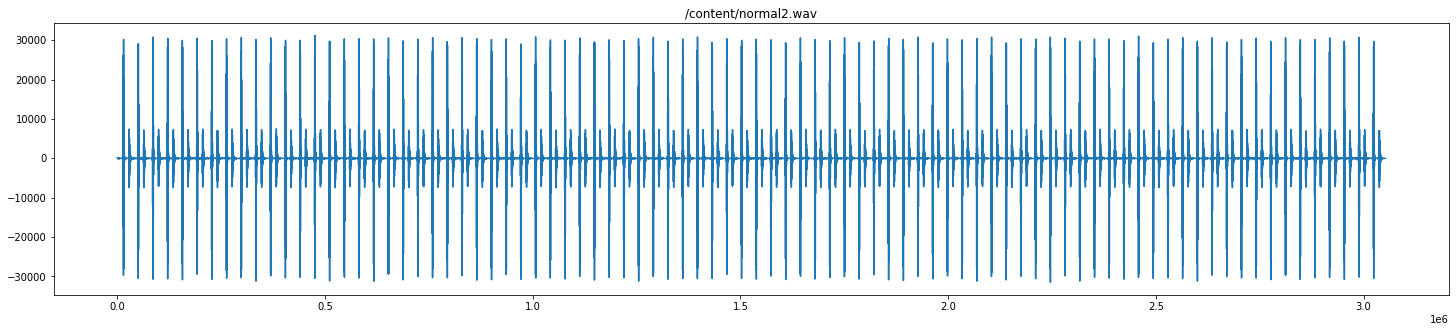

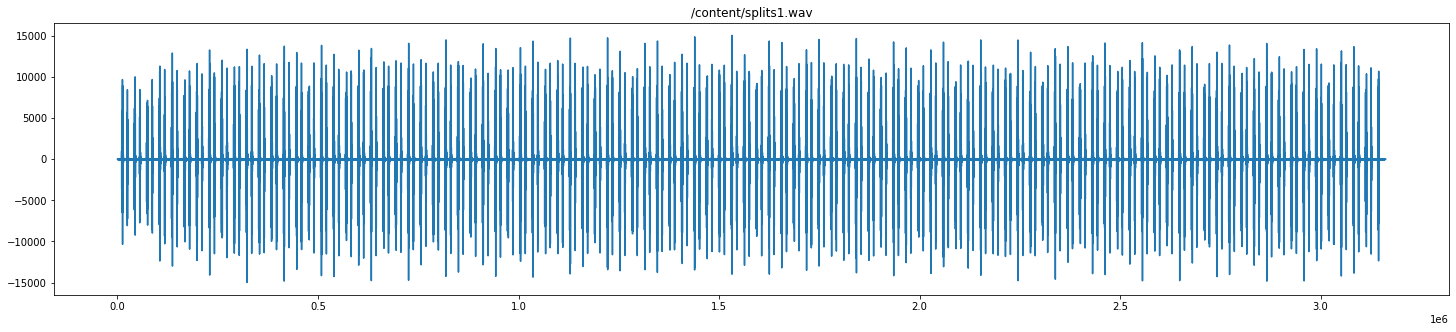

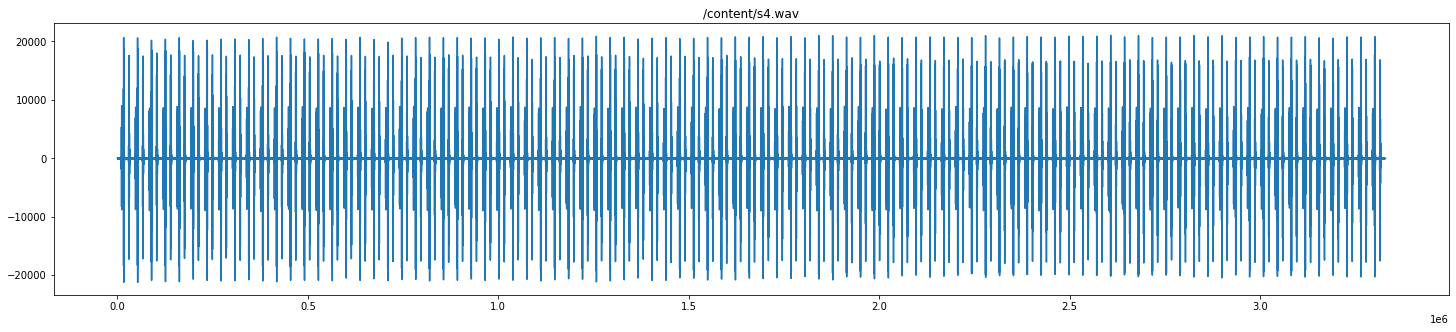

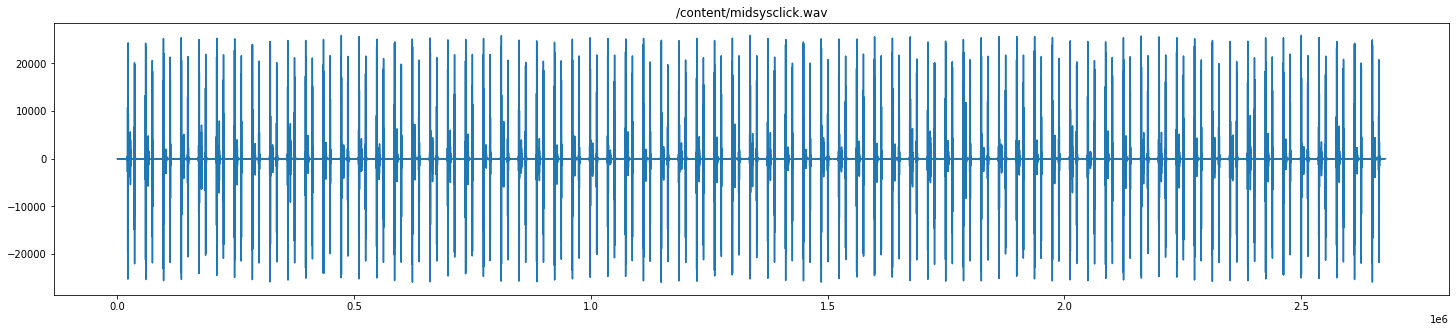

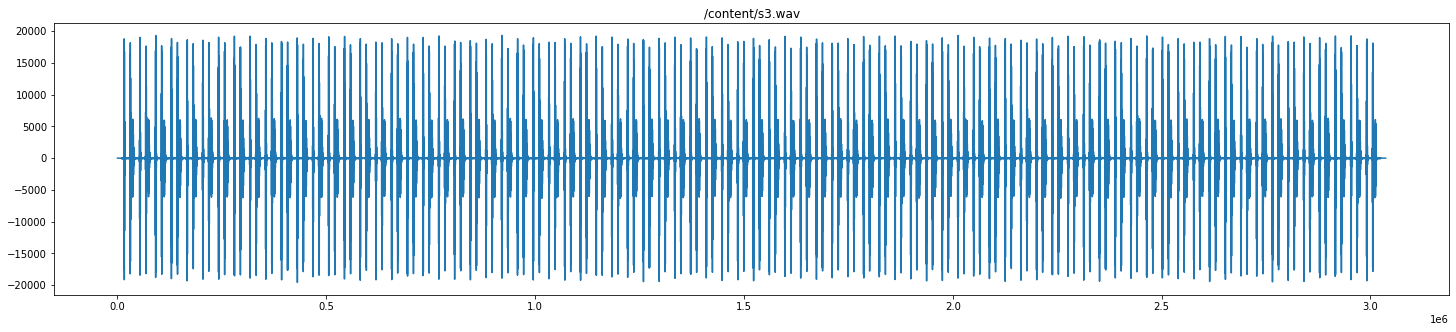

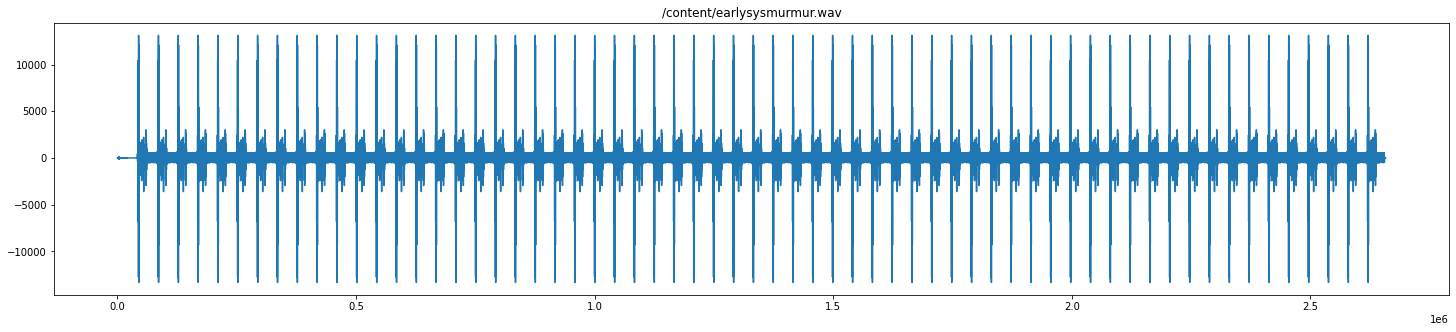

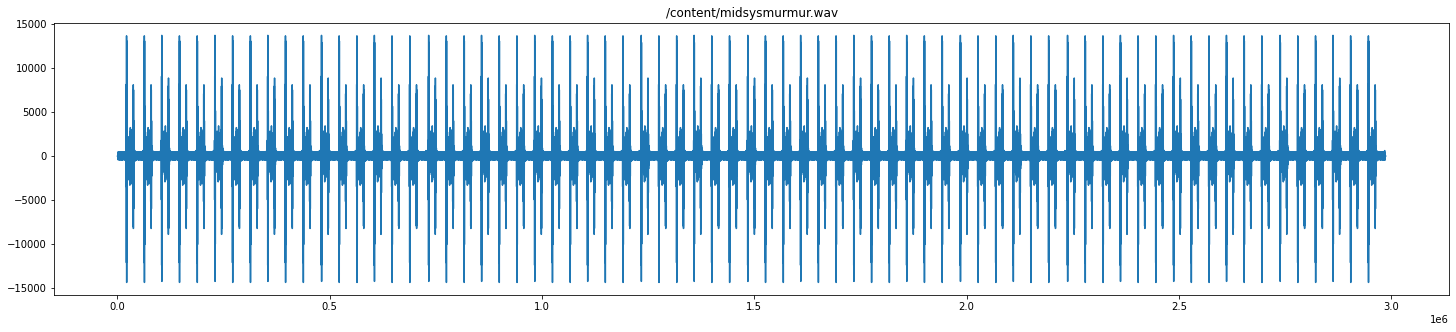

In [10]:
for i in filenames:
  printdetails(i)
  print(" ")

In [11]:
%matplotlib inline
import librosa.display

def loadwlibrosa(filename):
  s, r = librosa.load(filename, duration = 5)
  return s, r

def vizwlibrosa(filename):
  x, sr = loadwlibrosa(filename)
  plt.figure(figsize = (20, 3))
  librosa.display.waveplot(x, sr = sr)

def vizspectogram(filename):
  x, sr = loadwlibrosa(filename)
  S = librosa.stft(x)
  Sdb = librosa.amplitude_to_db(abs(S))
  plt.figure(figsize = (14,5))
  librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()

In [12]:
def strip(filename, frame_length, hop_length):
  s, r = loadwlibrosa(filename)
  # Compute RMSE.
  rmse = librosa.feature.rms(s, frame_length=frame_length, hop_length=hop_length, center=True)
  
  # Identify the first frame index where RMSE exceeds a threshold.
  thresh = 0.01
  frame_index = 0
  while rmse[0][frame_index] < thresh:
    frame_index += 1
  # Convert units of frames to samples.
  start_sample_index = librosa.frames_to_samples(frame_index, hop_length=hop_length)
  # Return the trimmed signal.
  return s[start_sample_index:]

In [13]:
def specrolloff(filename):
  s1, r = loadwlibrosa(filename)
  s = strip(filename, 512, 256)
  S, phase = librosa.magphase(librosa.stft(s))
  print(librosa.feature.spectral_rolloff(S=S, sr=r))
  
for i in filenames:
  specrolloff(i)
  print(" ")

[[139.96582031 139.96582031 129.19921875 107.66601562 107.66601562
  215.33203125 398.36425781 495.26367188 559.86328125 516.796875
  602.9296875  516.796875   409.13085938 129.19921875 107.66601562
   96.89941406  96.89941406  96.89941406  96.89941406 183.03222656
  226.09863281 290.69824219 398.36425781 527.56347656 452.19726562
  441.43066406 484.49707031 484.49707031 495.26367188 570.62988281
  527.56347656 549.09667969 538.33007812 322.99804688 150.73242188
  150.73242188 150.73242188 118.43261719 107.66601562 118.43261719
  247.63183594 441.43066406 441.43066406 473.73046875 495.26367188
  527.56347656 462.96386719 172.265625   118.43261719 107.66601562
   96.89941406  96.89941406  96.89941406  96.89941406 226.09863281
  344.53125    430.6640625  419.89746094 462.96386719 452.19726562
  516.796875   549.09667969 506.03027344 506.03027344 549.09667969
  549.09667969 570.62988281 559.86328125 215.33203125 150.73242188
  139.96582031 129.19921875 107.66601562 107.66601562 183.032226

In [14]:
def logpowspec(filename):
  s1, r = loadwlibrosa(filename)
  s = strip(filename, 512, 256)
  S, phase = librosa.magphase(librosa.stft(s))
  rms = librosa.feature.rms(S=S) # compute root-mean-square for each frame in magnitude
  plt.figure(figsize=(15, 5))
  plt.subplot(2, 1, 1)
  plt.semilogy(rms.T, label='RMS Energy', color="black")
  plt.xticks([])
  plt.xlim([0, rms.shape[-1]])
  plt.legend()
  plt.subplot(2, 1, 2)
  librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')
  plt.title('log power spectrogram')

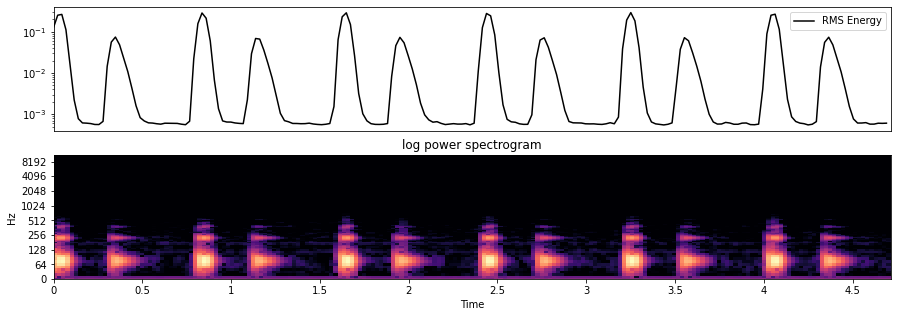

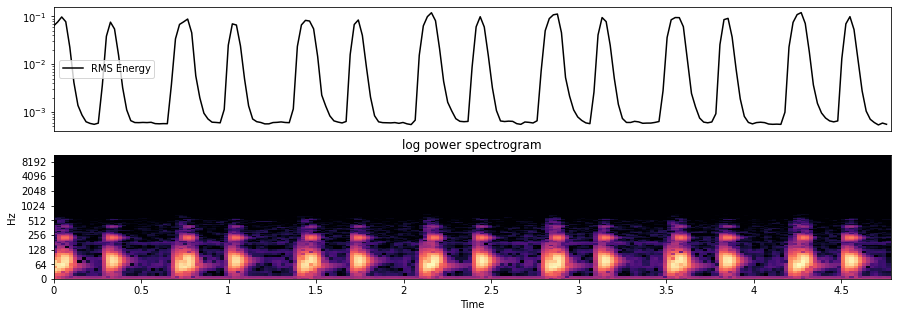

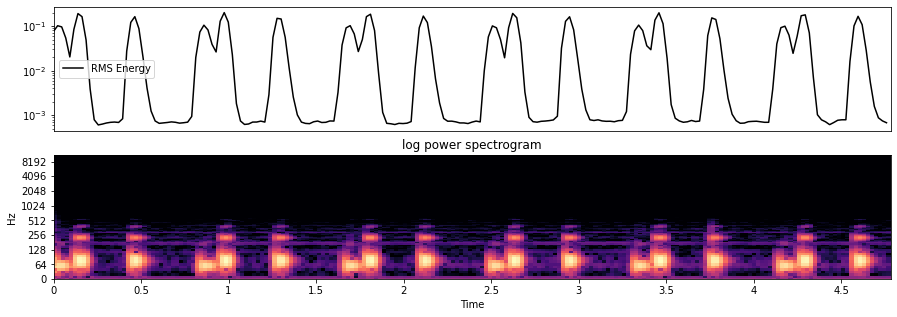

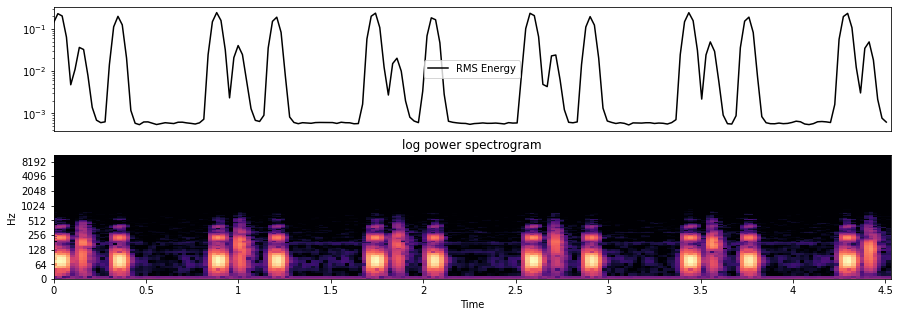

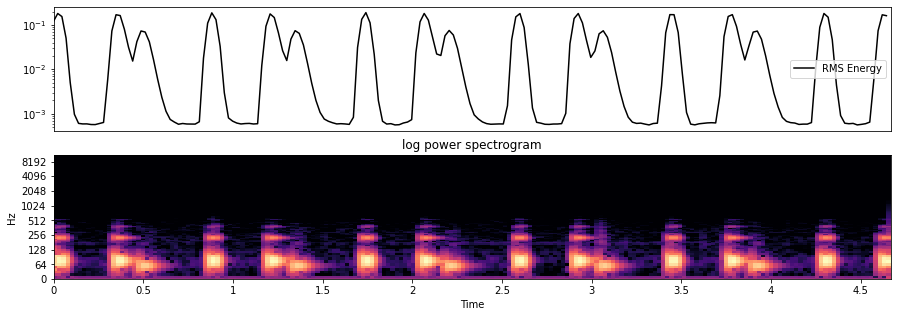

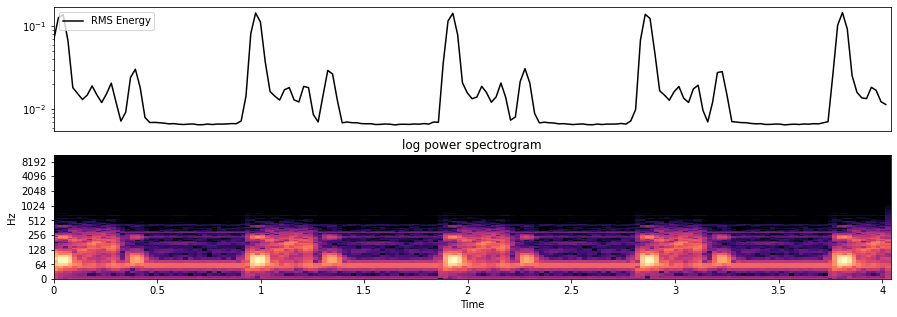

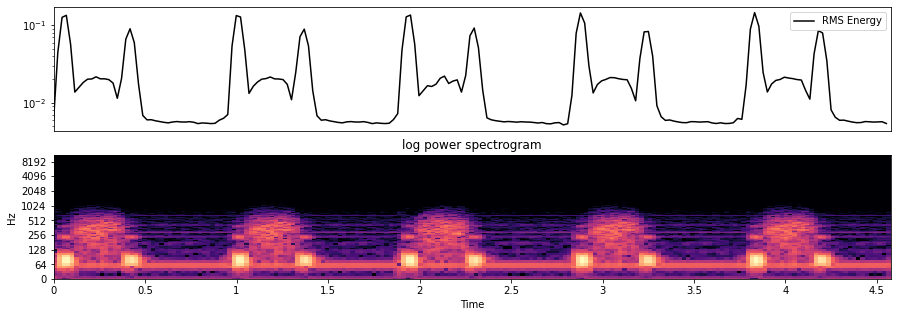

In [15]:
for i in filenames:
  logpowspec(i)
  print(" ")

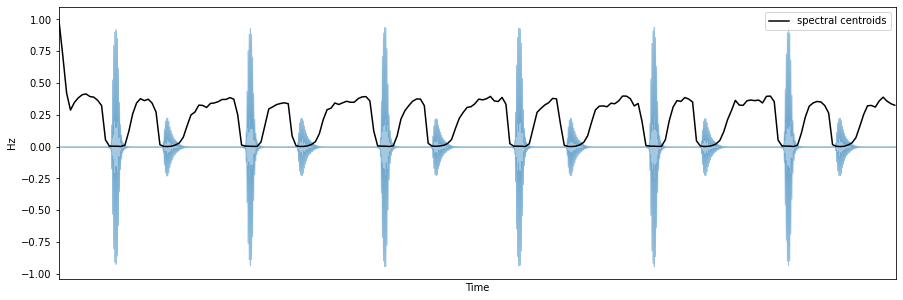

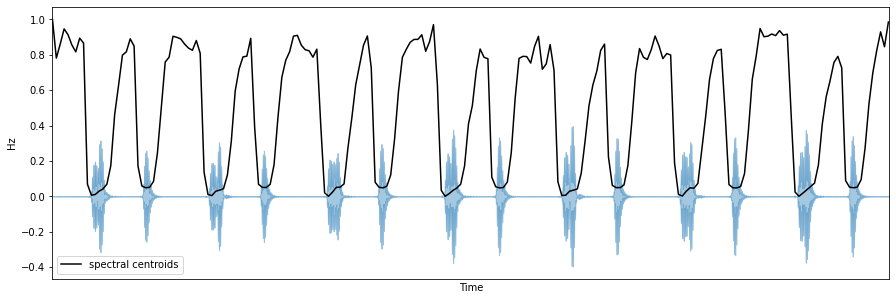

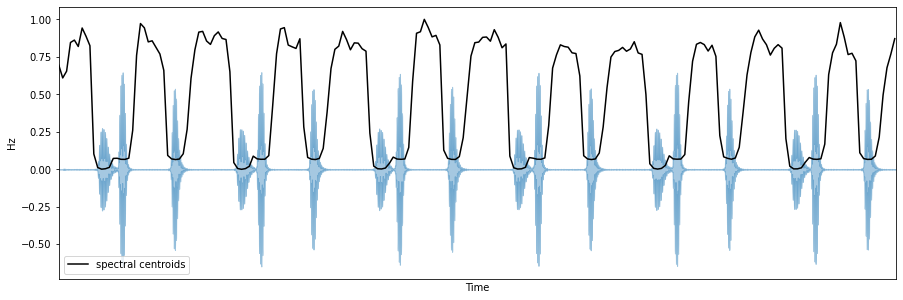

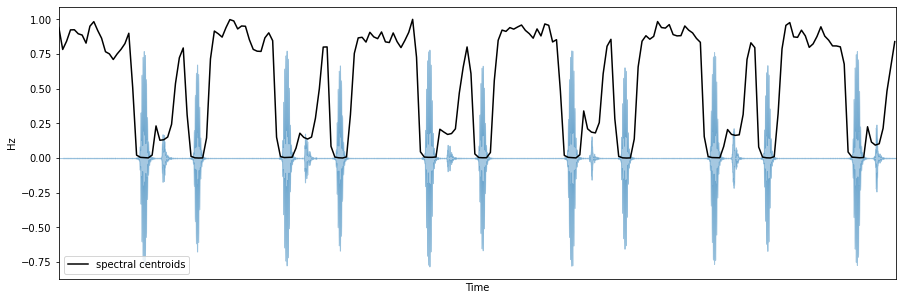

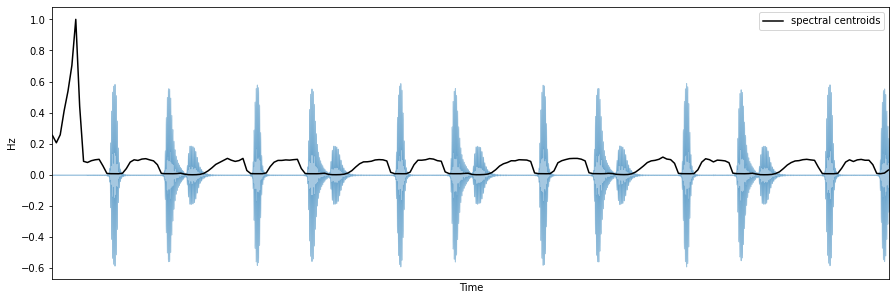

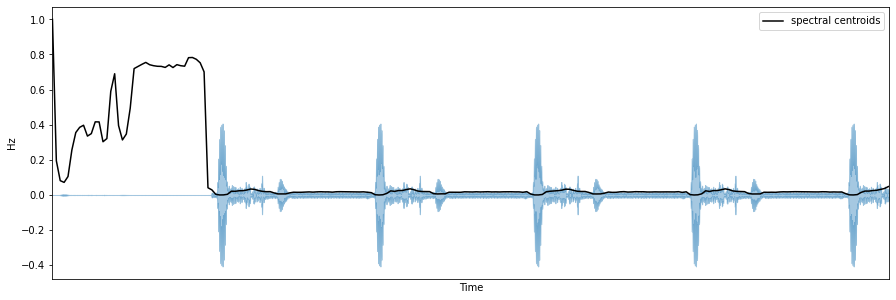

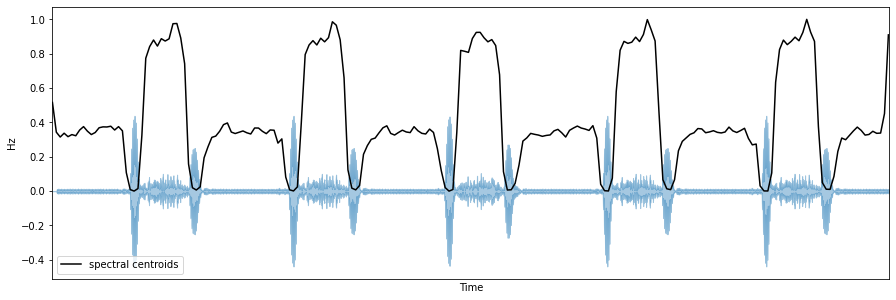

In [16]:
import sklearn
def speccentroid(filename):
  s, r = loadwlibrosa(filename)
  # compute the spectral centroid for each frame in a signal
  spectral_centroids = librosa.feature.spectral_centroid(y=s, sr=r)[0]
  spectral_centroids.shape
  # compute the time variable for visualization
  frames = range(len(spectral_centroids))
  f_times = librosa.frames_to_time(frames)
  # an auxiliar function to normalize the spectral centroid for visualization
  def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

  plt.figure(figsize=(15,5))
  plt.subplot(1, 1, 1)
  librosa.display.waveplot(s, sr=r, alpha=0.4)
  plt.plot(f_times, normalize(spectral_centroids), color='black', label='spectral centroids')
  plt.ylabel('Hz')
  plt.xticks([])
  plt.legend()

for i in filenames:
  speccentroid(i)
  print(" ")